<a href="https://colab.research.google.com/github/arkajyotimitra/mini_projects/blob/main/learningGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


This is a simple NN model with first layer having 128 neurons and second layer has 784 neuron which then gets reshaped into 28x28 matrix (basically an image)

In [2]:
def build_generator(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    model.add(Reshape((28, 28)))
    return model


Similar to the generator NN, the discriminator has one layer of 128 neurons and the final layer has only 1 since we want the discriminator to classify between real and fake (binary classifier)

In [3]:
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


In this we utilize both NN to create the GAN architecture. At first the discriminator is not trained by making trainable parameter as false. This means that the layes are frozen.

In [4]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


At first the image dimensions are set to 28 height and 28 width (rows,col). After that we define the noise vector as having 100 dimensions. That will be given to the generator.

In the discriminator, we use the loss binary cross entropy which minimizes the entropy iteratively, with adam optimizer.

In the generator side, we provide the noise vector.

We compile the gan with similar loss and optimizer. Why did we not compile the generator here? Because it is not trained separately but with the GAN achitecture itself.

In [5]:
# Image dimensions
img_rows, img_cols = 28, 28
input_dim = 100  # Noise vector dimension

# Build and compile the discriminator
discriminator = build_discriminator((img_rows, img_cols))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Build the generator
generator = build_generator(input_dim)

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())


In [30]:
# def train_gan(generator, discriminator, gan, epochs, batch_size, input_dim):
#     # Load the dataset (e.g., MNIST)
#     # For simplicity, we'll use random noise as the dataset
#     X_train = np.random.normal(0, 1, (batch_size, 28,28))
#     # print(X_train.shape)

#     for epoch in range(epochs):
        # # Generate fake images
        # gen_images = generator.predict(np.random.normal(0, 1, (batch_size, input_dim)))
        # # print(X_train.shape,gen_images.shape)
        # # Concatenate real and fake images
        # X = np.concatenate([gen_images, X_train])

        # # Labels for generated and real data
        # y_dis = np.zeros(2 * batch_size)
        # y_dis[:batch_size] = 0.9  # Label smoothing

        # # Train discriminator
        # discriminator.trainable = True
        # d_loss = discriminator.train_on_batch(X, y_dis)

        # # Train generator
        # noise = np.random.normal(0, 1, (batch_size, input_dim))
        # y_gen = np.ones(batch_size)
        # discriminator.trainable = False
        # g_loss = gan.train_on_batch(noise, y_gen)

        # # Print progress
        # print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {d_loss[0]} | Generator Loss: {g_loss}")

        # # # Optionally, save generated images
        # if epoch % save_interval == 0:
        #     save_generated_images(generator, epoch)


In [27]:
def save_generated_images(generator, epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, input_dim))
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')


In [ ]:
# epochs = 20000  # Number of training epochs
# batch_size = 128  # Batch size
# save_interval = 1000  # Interval for saving generated images

# train_gan(generator, discriminator, gan, epochs, batch_size, input_dim)


In [32]:
# from tensorflow.keras.datasets import mnist

def train_gan(generator, discriminator, gan, epochs, batch_size, input_dim):
    # Load the MNIST dataset
    (X_train, _), (_, _) = mnist.load_data()
    # Normalize pixel values to [-1, 1]
    X_train = X_train.astype(np.float32)/255.0
    X_train = np.expand_dims(X_train, axis=-1)

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Select a random batch of real images from the MNIST dataset
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]

        # Generate a batch of fake images
        noise = np.random.normal(0, 1, (batch_size, input_dim))
        gen_images = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, valid)
        d_loss_fake = discriminator.train_on_batch(gen_images, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, input_dim))
        g_loss = gan.train_on_batch(noise, valid)

        # Print progress
        print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {d_loss[0]} | Generator Loss: {g_loss}")

        # Optionally, save generated images
        if epoch % save_interval == 0:
            save_generated_images(generator, epoch)


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 8ms/step
Epoch 10503/20000 | Discriminator Loss: 0.24247514456510544 | Generator Loss: 2.646028995513916
4/4 [==============================] - 0s 8ms/step
Epoch 10504/20000 | Discriminator Loss: 0.27306582778692245 | Generator Loss: 2.9114017486572266
4/4 [==============================] - 0s 5ms/step
Epoch 10505/20000 | Discriminator Loss: 0.22863751649856567 | Generator Loss: 2.8967044353485107
4/4 [==============================] - 0s 9ms/step
Epoch 10506/20000 | Discriminator Loss: 0.18878784030675888 | Generator Loss: 3.1164140701293945
4/4 [==============================] - 0s 3ms/step
Epoch 10507/20000 | Discriminator Loss: 0.2624824792146683 | Generator Loss: 3.2758233547210693
4/4 [==============================] - 0s 5ms/step
Epoch 10508/20000 | Discriminator Loss: 0.22760045528411865 | Generator Loss: 3.043163776397705
4/4 [==============================] - 0s 3ms/step
Epoch 10509/2

KeyboardInterrupt: 

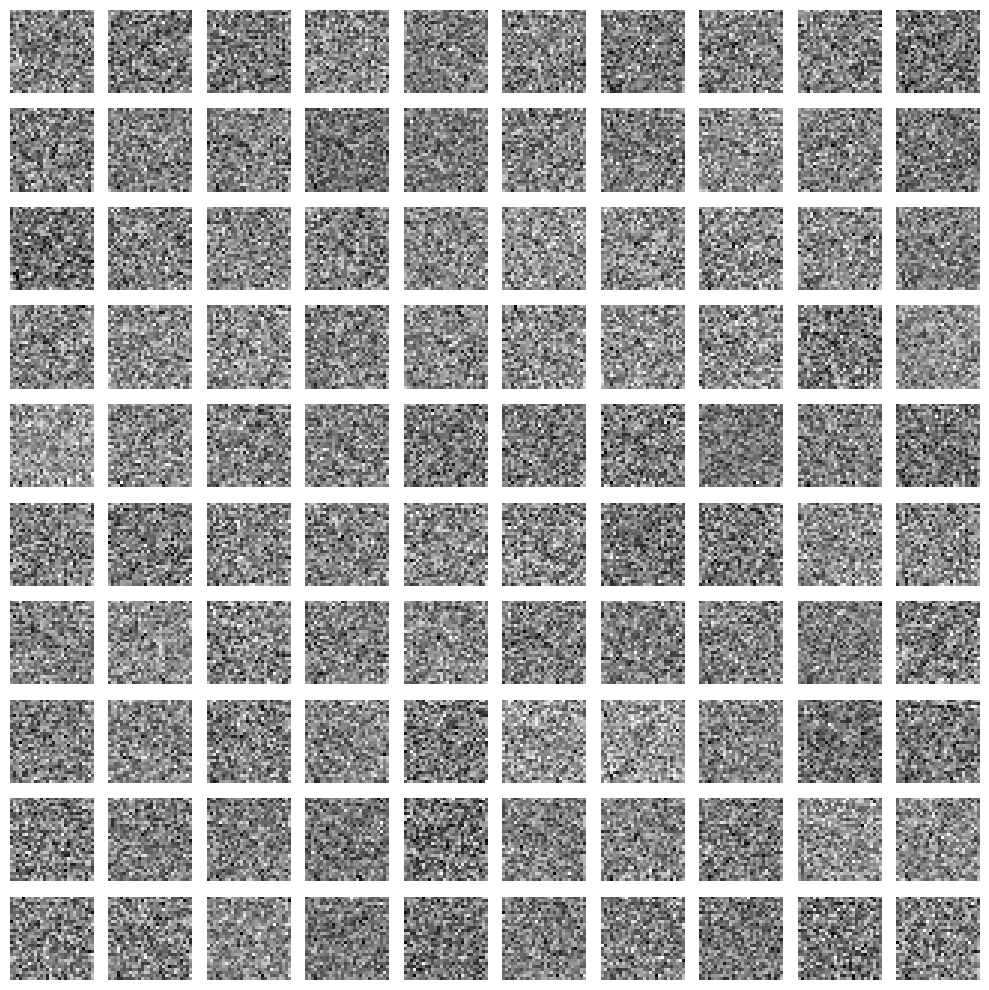

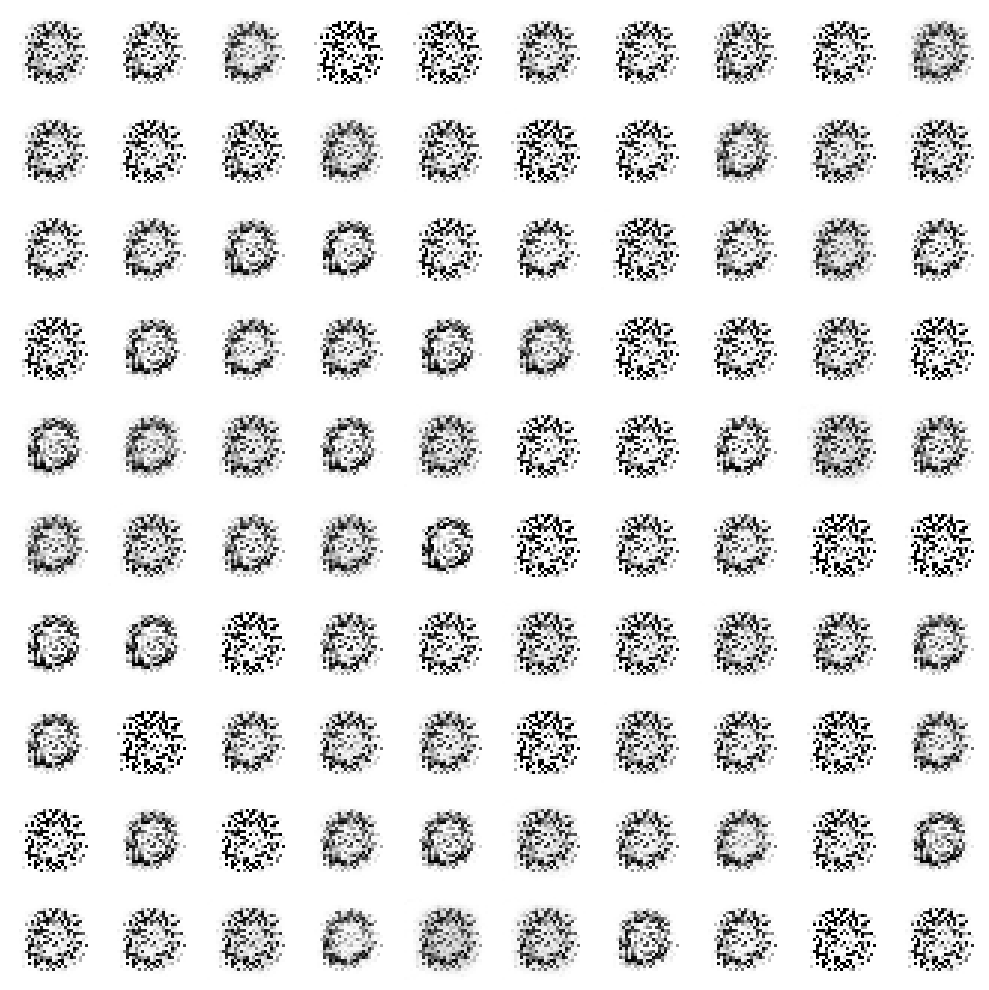

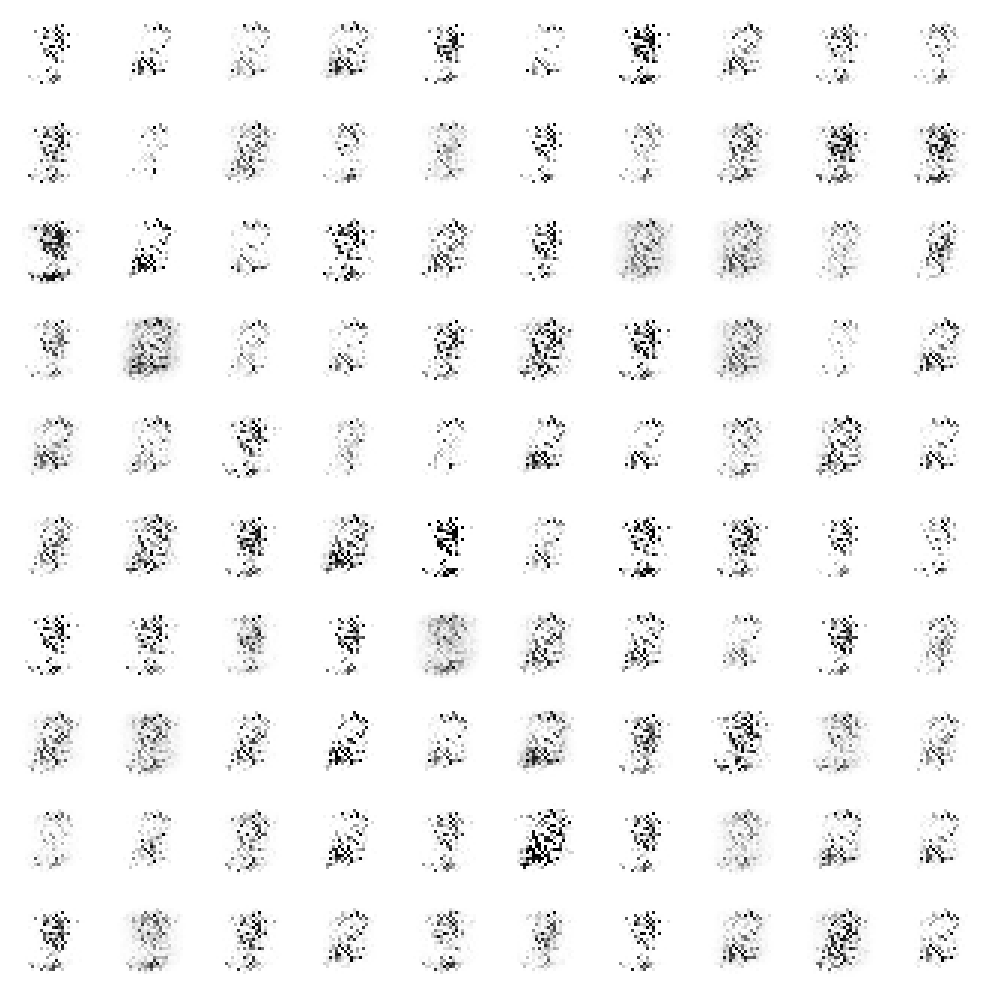

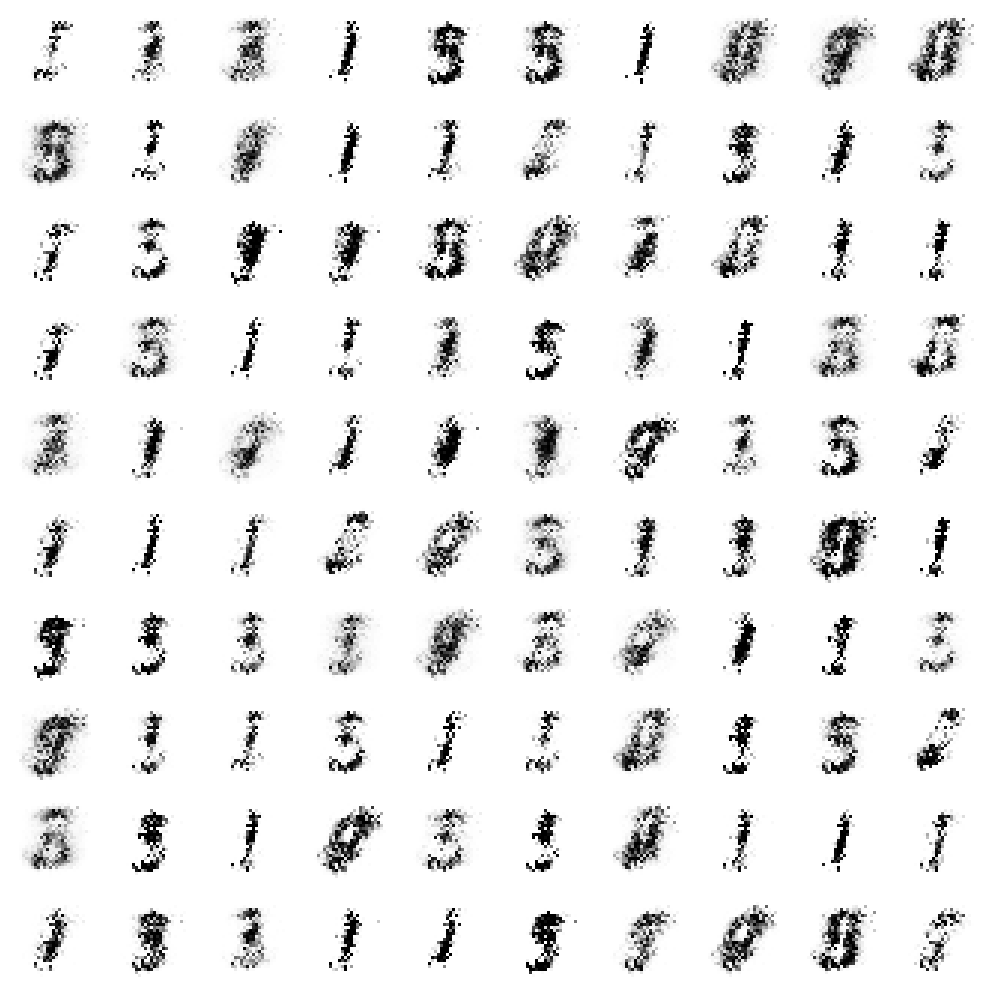

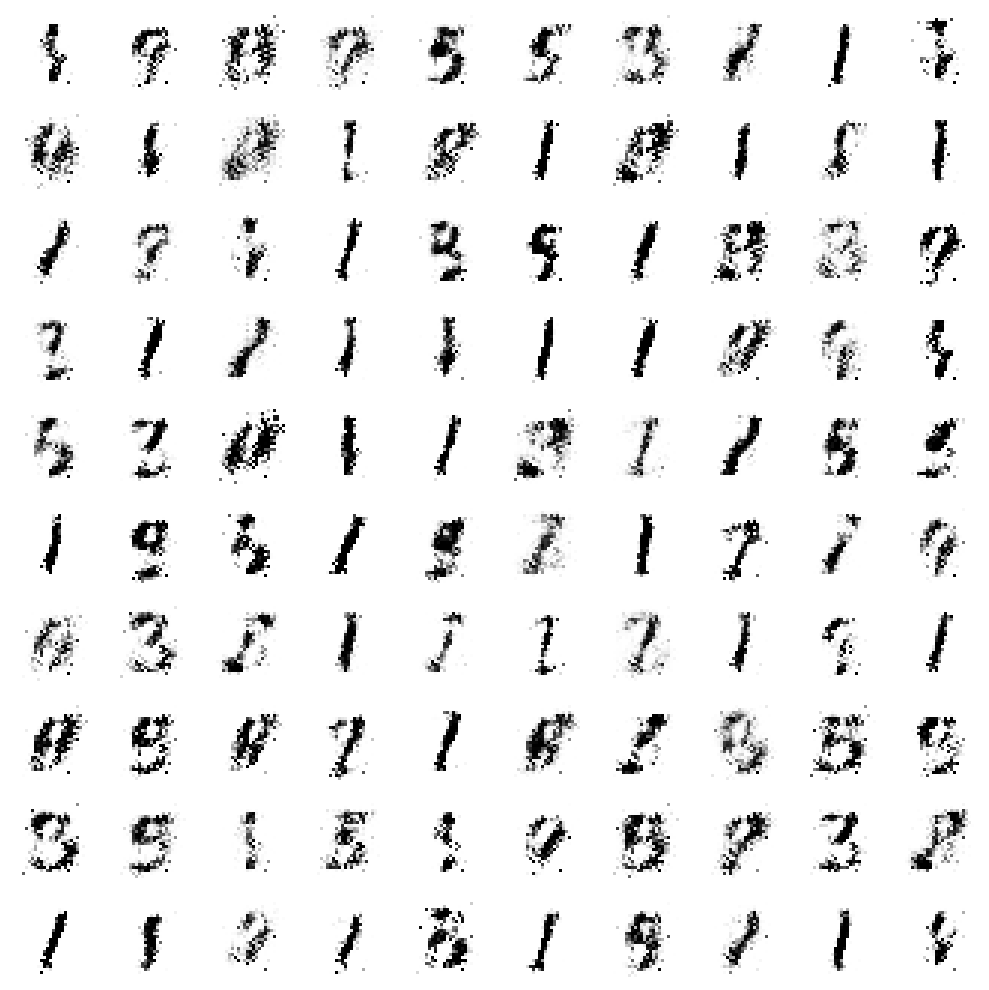

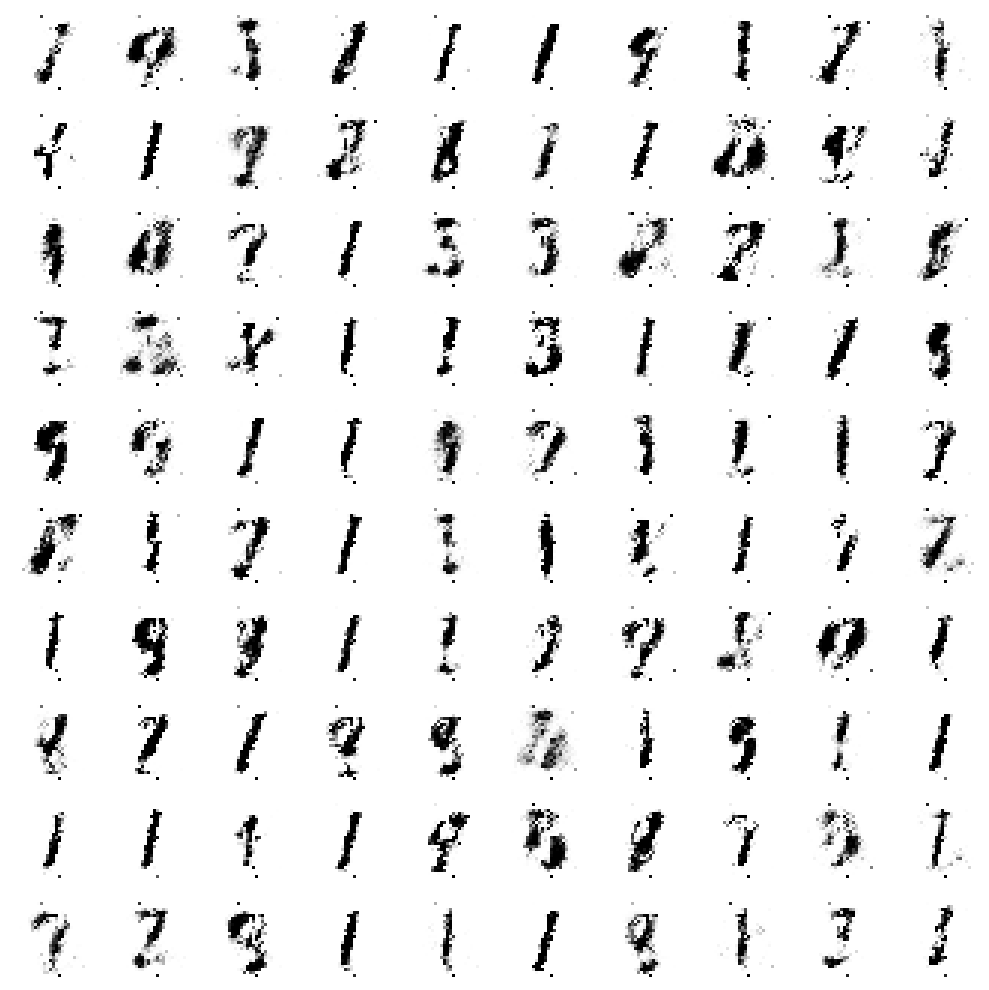

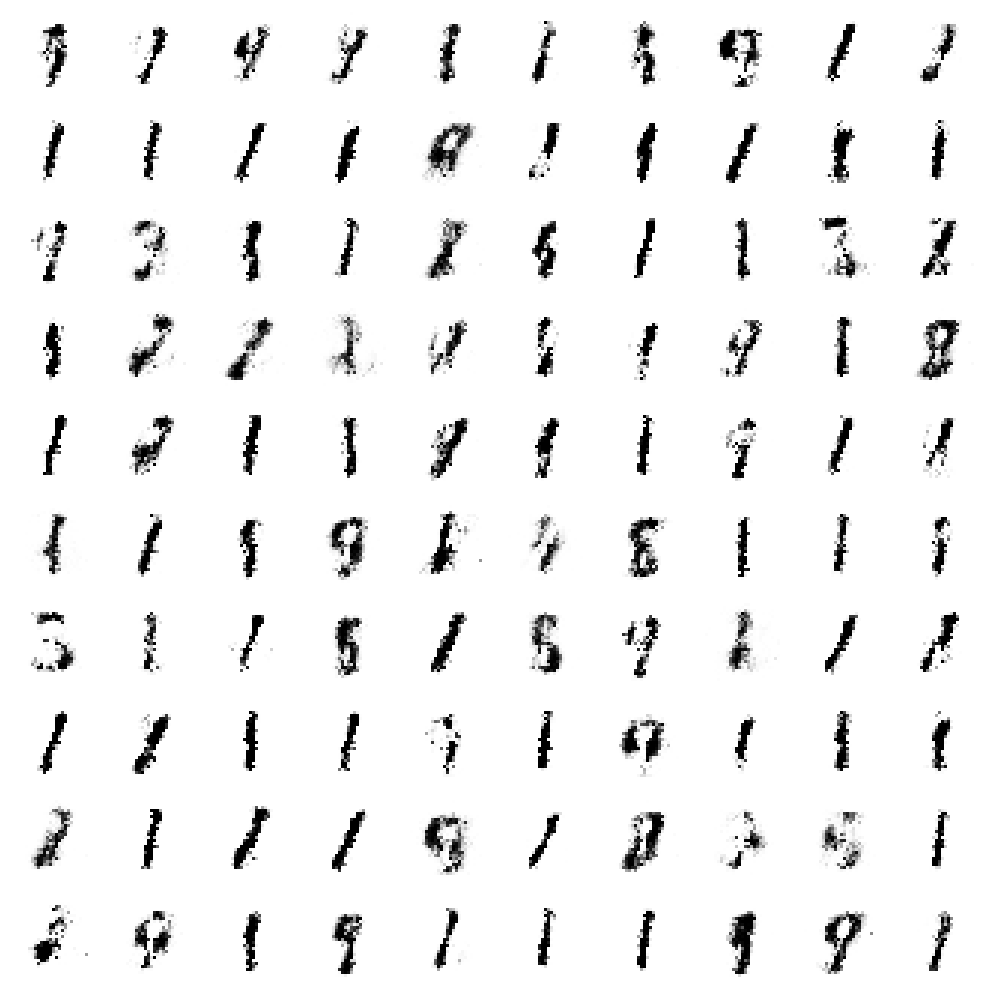

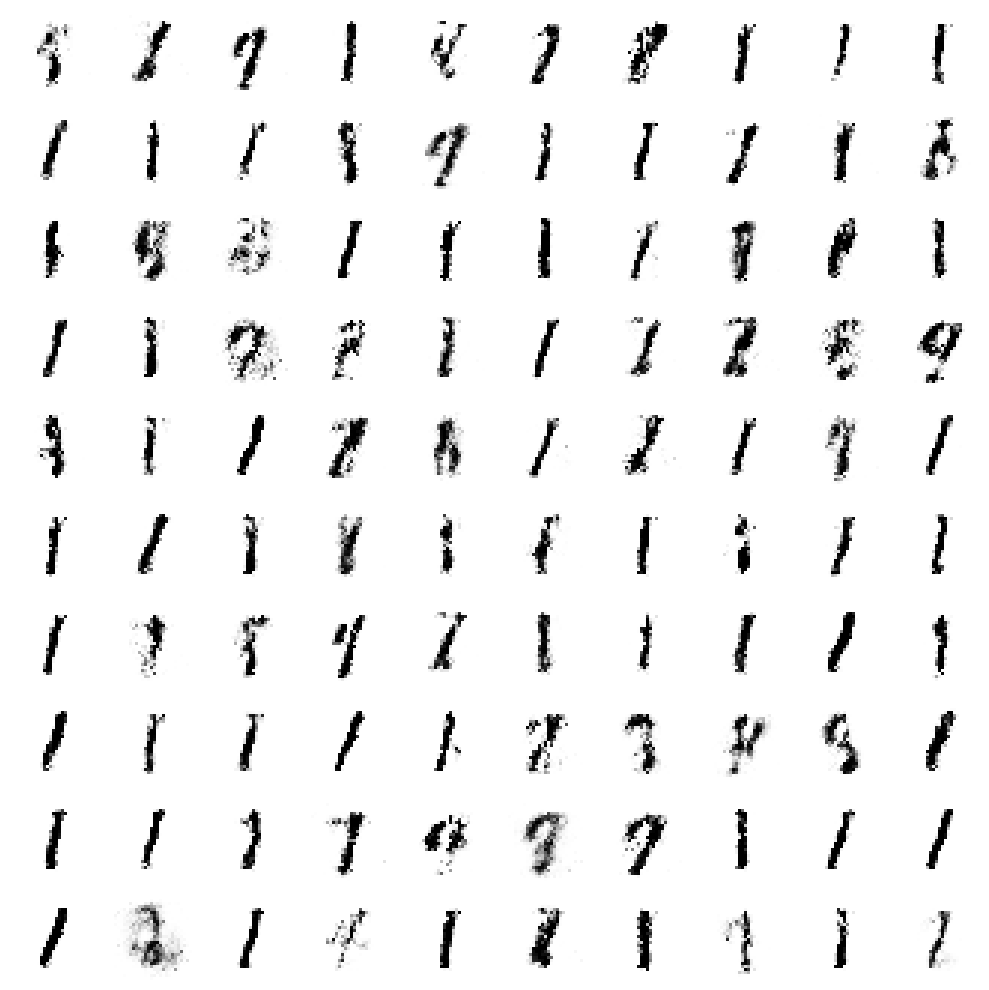

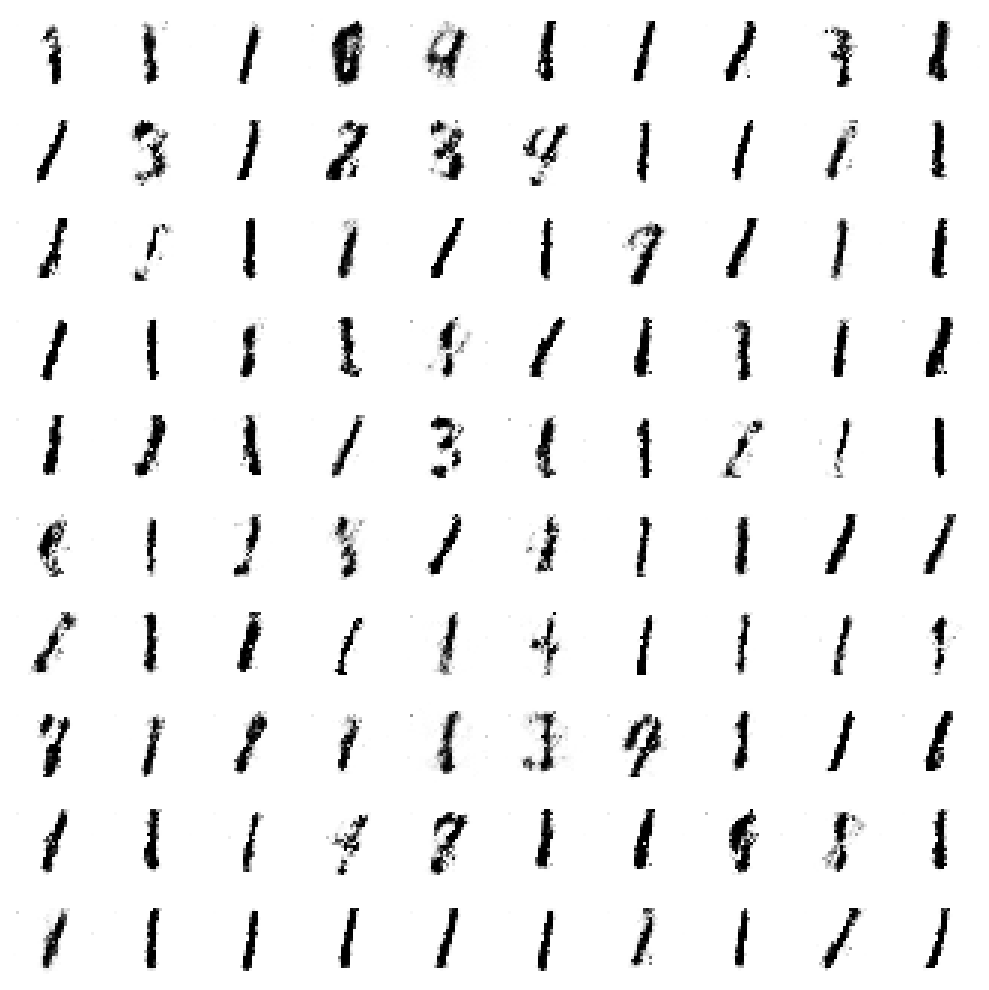

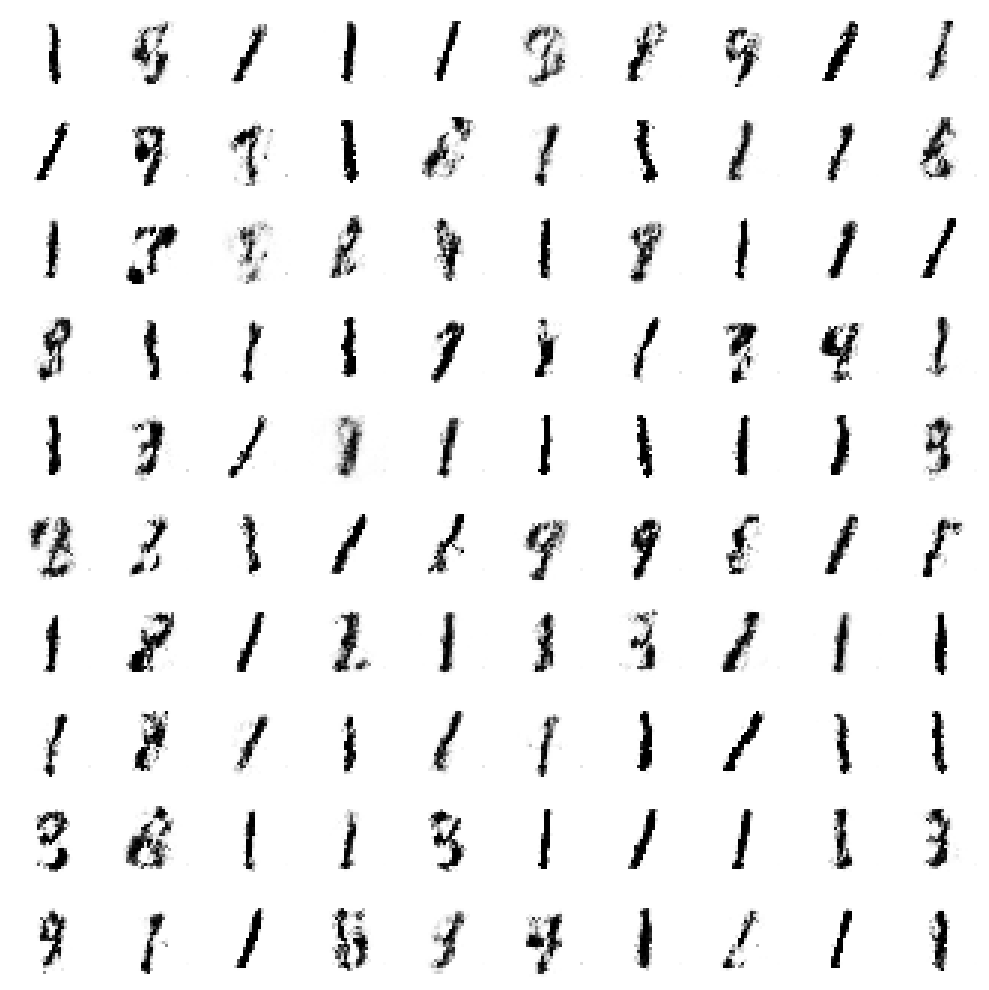

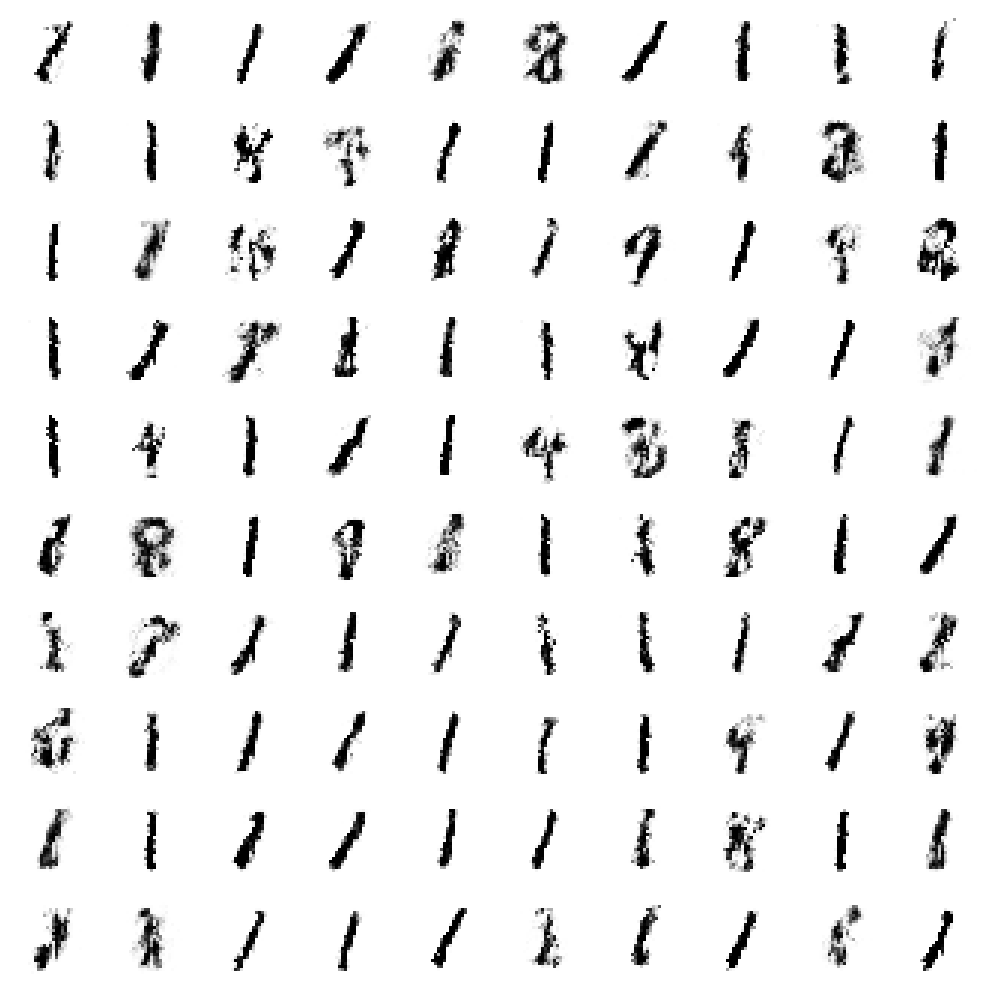

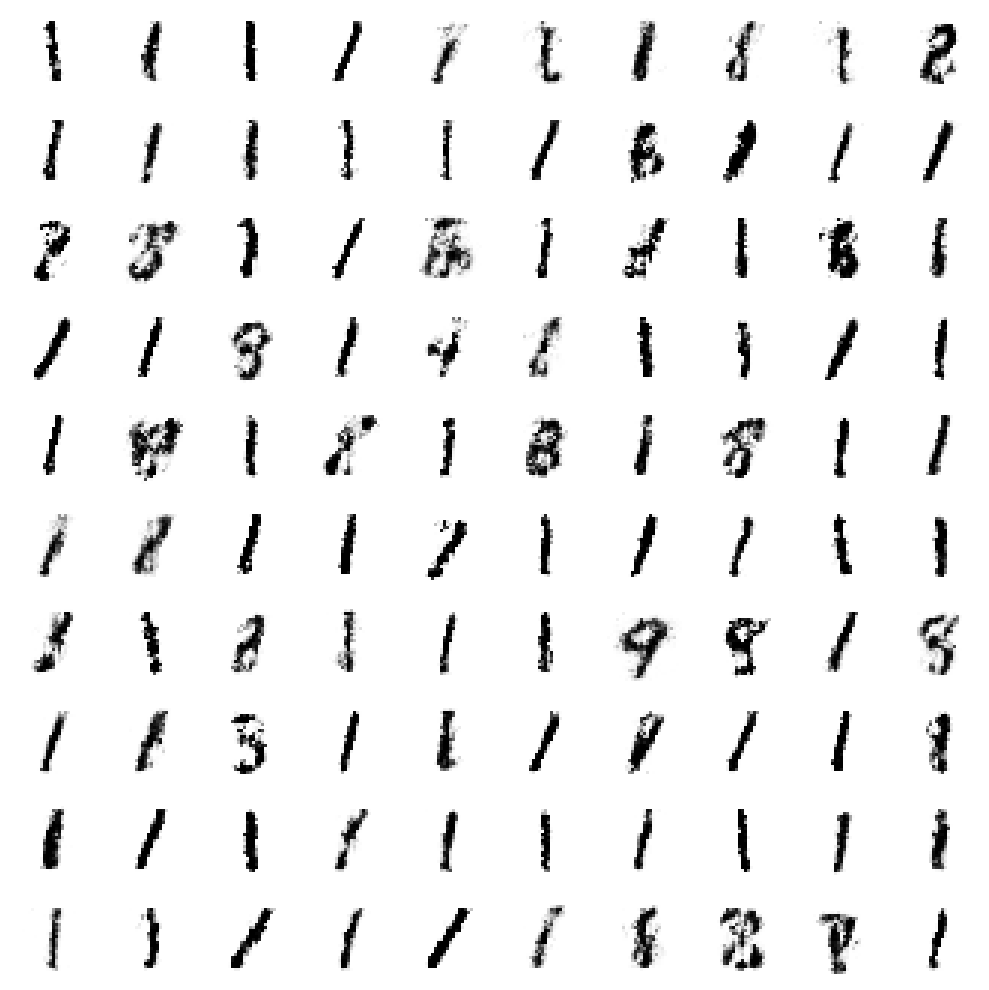

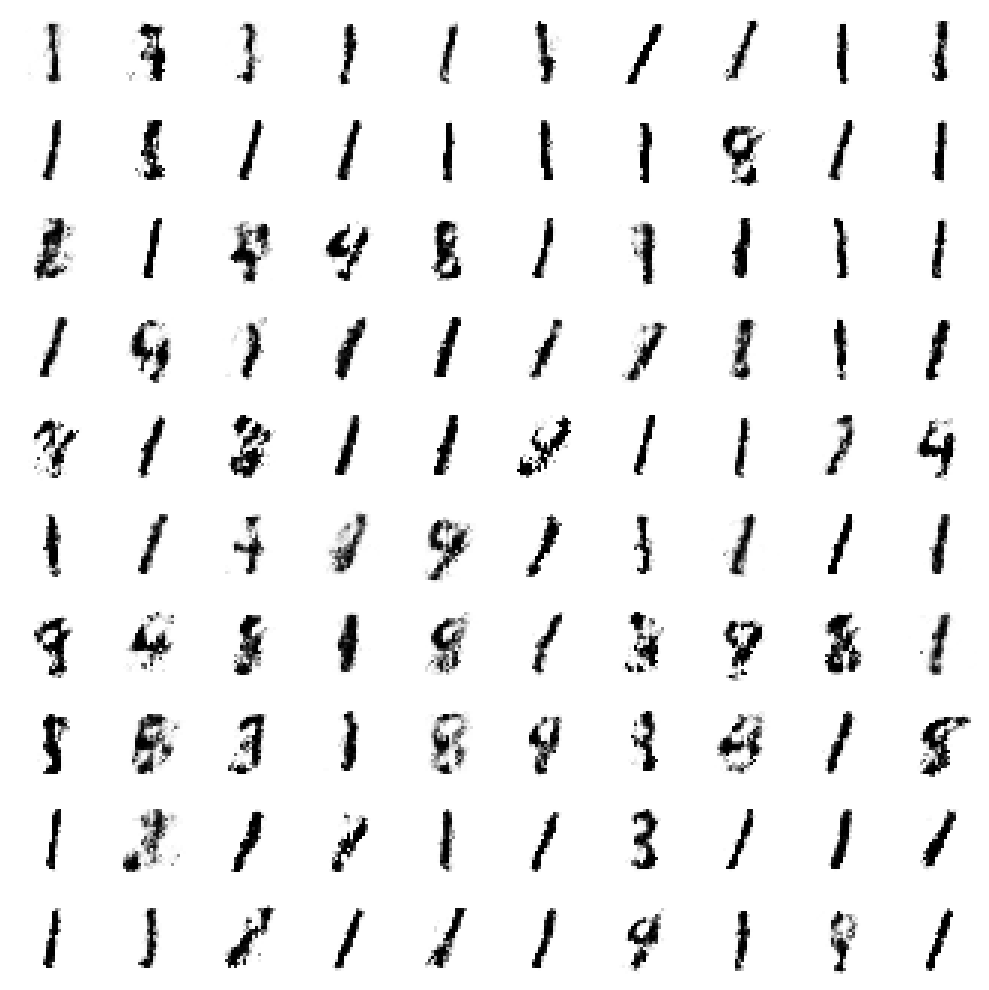

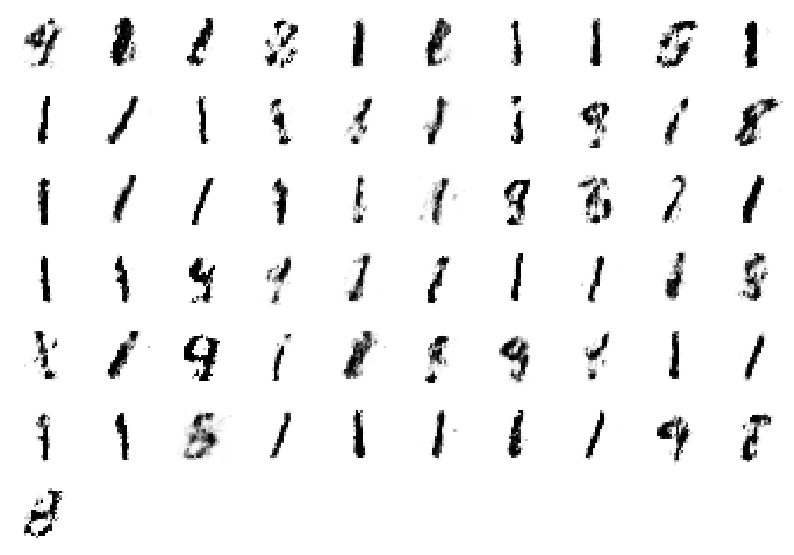

In [33]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Normalize the pixel values to be in the range [0, 1]
X_train = X_train.astype('float32') / 255.0

# Reshape the images to match the input shape expected by the discriminator
X_train = np.expand_dims(X_train, axis=-1)  # Add a channel dimension

# Example of how to train the GAN using the MNIST dataset
epochs = 20000  # Number of training epochs
batch_size = 128  # Batch size
input_dim = 100  # Noise vector dimension
save_interval = 1000  # Interval for saving generated images

# Build and compile the discriminator
discriminator = build_discriminator(X_train.shape[1:])
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Build the generator
generator = build_generator(input_dim)

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

# Train the GAN
train_gan(generator, discriminator, gan, epochs, batch_size, input_dim)
